In [1]:
pwd

'/home/carlos2/REPOS/SLCU/waverod/FINAL/devfinal'

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual#, clear_output
import numpy as np
from scipy.spatial.transform import Rotation as R
import subprocess
#from mathpy.numerical.roots import newtonraph
from scipy.optimize import newton
from sympy import *

In [3]:
#The persistence length of a MT=6000 micro-meters.
lp=6 #6 mm. The MT diameter is 25 nm 
L1=-0.5*lp
L2=0.5*lp
pi=np.pi #Pi
#Surface Parameters A,ld,phi-Amplitude,wavelength, phase
A=0.5; Amin=0.0; Amax=1.0 #Amplitude
ld=1.7; ldmin=0.01; ldmax=5.0 #Wavelength
phio=pi/4; phimin=0.; phimax=2*pi;
#Points
x1o=0.5*L1;y1o=(1.1)*A;
x2o=-x1o;y2o=y1o;

x1min=L1; x1max=L2
y1max=Amax; y1min=0.0;
x2min=L1;x2max=L2
y2min=0.0;y2max=Amax
print(x1o,y1o)
print(x2o,y2o)


Ah = widgets.FloatSlider(value=A,min=Amin,max=Amax,step=Amax/100, description="Amp",continuous_update=False)
wl = widgets.FloatSlider(value=ld,min=ldmin,max=ldmax,step=0.01, description="lambda",continuous_update=False)
phi = widgets.FloatSlider(value=phio,min=phimin,max=phimax,step=0.01,  description="phase",continuous_update=False)

ax=widgets.FloatSlider(value=x1o,min=x1min,max=x1max,step=0.001, description="xa",continuous_update=False)
ay=widgets.FloatSlider(value=y1o,min=y1min,max=y1max,step=0.001, description="ya",continuous_update=False)

bx=widgets.FloatSlider(value=x2o,min=x2min,max=x2max,step=0.001, description="xb",continuous_update=False)
by=widgets.FloatSlider(value=y2o,min=y2min,max=y2max,step=0.001, description="yb",continuous_update=False)

wi = widgets.HBox([Ah,wl,phi])
ui = widgets.HBox([ax,ay,bx,by])

-1.5 0.55
1.5 0.55


In [4]:
def beta(A,k,phi,xa,ya,xb,yb,m):
    x=np.linspace(xa,xb,100)
    h=A*np.cos(k*x+phi);dh=-A*k*np.sin(k*x+phi);tau=np.sqrt(1+dh**2)
    beta1=tau*(h+m*(xa-x)-ya);beta2=1+m*dh;beta=beta1/beta2
    return x,beta

def betapoint(x,A,k,phi,xa,ya,m):
    h=A*np.cos(k*x+phi);dh=-A*k*np.sin(k*x+phi);tau=np.sqrt(1+dh**2)
    beta1=tau*(h+m*(xa-x)-ya);beta2=1+m*dh;beta=beta1/beta2
    return beta

def lambdax(beta,x,A,k,phi,xa,ya,xb,yb,m):
    #x=np.linspace(xa,xb,100)
    h=A*np.cos(k*x+phi);dh=-A*k*np.sin(k*x+phi);tau=np.sqrt(1+dh**2);
    beta1=(h-ya-(beta/tau));
    beta2=(yb-ya);
    return beta1/beta2

def lambdapoint(beta,x,A,k,phi,ya,yb,m):
    h=A*np.cos(k*x+phi);dh=-A*k*np.sin(k*x+phi);tau=np.sqrt(1+dh**2)
    beta1=(h-ya-(beta/tau));
    beta2=(yb-ya)
    return beta1/beta2

def roots(xa,ya,xb,yn,A,k,phi):
    return [x1,x2]

def tstnm(A,k,phi,m,ax,ay,bx,by):
    xn=np.linspace(ax,bx,10000)
    angle=k*xn+phi
    h=A*np.cos(angle) 
    dh=-A*k*np.sin(angle)
    ddh=-k*k*h
    dddh=-k*k*dh
        
    tau=np.sqrt(1+dh*dh)
    dtau=dh*ddh/tau;
    ddtau=(ddh*ddh+dh*dddh)/(tau*tau)   
    num=(1+m*dh);
    den=1/(1+m*dh);
    Z=den*tau;    
    dZ=(den*dtau)-tau*m*ddh*den*den;
    ddZ=ddtau*den-den*den*m*(2*dtau*ddh-tau*dddh)+2*den*den*den*tau*(m*ddh)**2
    u=Z*(ay-h+m*(xn-ax))
    du=dZ*((m*xn-h)+(ay-m*ax))+Z*(m-dh)
    ddu=ddZ*(m*xn-h+ay-m*ax)+2*dZ*(m-dh)-ddh*Z 
    H=du/ddu
    return xn, u , du ,ddu, H
    

def nm(A,k,phi,m,ax,ay,bx,by,xo):
    EPS=np.finfo(np.float32).eps
    ni=0
    #print(EPS)
    xn=xo
    xmin=0
    itnum=0
    H=1
    while(np.abs(H)>EPS):
        
        angle=k*xn+phi
        
        h=A*np.cos(angle) 
        dh=-A*k*np.sin(angle)
        ddh=-k*k*h
        dddh=-k*k*dh
        
        tau=np.sqrt(1+dh*dh)
        dtau=dh*ddh/tau;
        ddtau=(ddh*ddh+dh*dddh)/(tau*tau)
        
        num=(1+m*dh);
        den=1/(1+m*dh);
     
        Z=den*tau;
        
        
       
        
        dZ=(den*dtau)-tau*m*ddh*den*den;
        ddZ=ddtau*den-den*den*m*(2*dtau*ddh-tau*dddh)+2*den*den*den*tau*(m*ddh)**2
        
        #du=dZ*( m*xn-h+interval[1]-m*interval[0]) + Z*(m-dh);
        du=dZ*((m*xn-h)+(ay-m*ax))+Z*(m-dh)
        ddu=ddZ*(m*xn-h+ay-m*ax)+2*dZ*(m-dh)-ddh*Z
        
        H=du/ddu
        xn=xn-H;
        xmin=xn
        itnum+=1
        
        if xn<ax or xn>bx or itnum>100:
            if xn<ax:
                xmin=ax 
            if xn>bx:
                xmin=bx
            #if xn>ax and xn<bx:
            #    xmin=xn
            if itnum>100:
                xmin=0.0
            break;
    if itnum>100:    
        print('Did not converged in '+str(itnum)+' iterations')
    else:
        print('Converged in '+str(itnum)+' iterations')
        print(xmin)
    return xmin

#### 0.5 1.76 0.7853981633974483 -1.271 0.09 0.948 0.184

In [16]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 10 ), sharex=False, sharey=False)
plt.close(fig)
def f(Ah,wl,phi,ax,ay,bx,by):
    #XA=[]
    updown=False
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    #print(ax,bx)
    lx1=ax-1.9;lx2=bx+1.9;
    #print(lx1,lx2)
    ax1.set_xlim([lx1, lx2])
    x=np.linspace(lx1,lx2,1000)
    k=2*pi/wl
    y=Ah*np.cos(k*x+phi)
    ax1.plot(x,y,"-")
    ax1.plot([ax,bx],[ay,by],'-')
    ax1.plot([ax],[ay],'s',markersize=9)
    ax1.plot([bx],[by],'s',markersize=9)
    m=(by-ay)/(bx-ax); b=ay-m*ax;
    #print(m,b)
    y2=m*x+b
    ax1.plot(x,y2,'--')
    ########################################
    print(Ah, wl,phi,ax,ay,bx,by)
    xroots=[]
    dx=0.01*(bx-ax)
    xn=ax
    cnt=0
    if (ay<Ah) or (by<Ah):
        #ax4.axhline(Ah*k,linestyle='--',linewidth=5);
        #ax4.axhline(np.abs(m))
        #ax4.set_xlim([0,1])
        #ax4.set_xlim([0,Ah*k+1.0])
        if m*ax+b<Ah*np.cos(k*xn+phi):
            xroots.append(ax)
            cnt+=1
        while cnt<=1:
            angle1=k*xn+phi
            angle2=k*(xn+dx)+phi
            y1n=m*xn+b-Ah*np.cos(angle1)
            y2n=m*(xn+dx)+b-Ah*np.cos(angle2)
            if (y1n<0) and (y2n>0):
                xroots.append(xn)
                cnt+=1
            if (y1n>0.0) and (y2n<0.0):
                xroots.append(xn+dx)
                cnt+=1
            if (xn+dx)>=bx:
                xroots.append(bx)
                cnt+=1
                
            xn+=dx
    print(xroots)
    if len(xroots)>0:
        x1=xroots[0];y1=m*x1+b;x2=xroots[1];y2=m*x2+b
        print("+++++++++")
        nwmin=[]
        print("POINTS GIVEN:\n")
        print(x1,y1,x2,y2)
        for xk in [x1,x1+0.5*(x2-x1),x2]:
            nwmin.append(nm(Ah,k,phi,m,x1,y1,x2,y2,xk))
        print(nwmin) #nm(A,k,phi,m,ax,ay,bx,by)
        bmins=[betapoint(xj,Ah,k,phi,x1,y1,m) for xj in nwmin]
        print(bmins)      #ax2.plot([x2,x2],[0,b2])
        
        xt, tu, tdu, tddu, th = tstnm(Ah,k,phi,m,x1,y1,x2,y2)
        ax3.plot(xt,tu,'o')
        ax4.plot(xt,tdu)
        ax4.axhline(0.0,c='black')
        print("+++++++++")
        
        #for pt in range(len(nwmin)):
        #    ax2.plot([nwmin[pt],nwmin[pt]],[0,bmins[pt]])
    #######################################
    PROCM=['./wdtest',str(Ah), str(wl), str(phi), str(ax), str(ay), str(bx), str(by)]
    process = subprocess.Popen(PROCM, stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    ZM = process.communicate()
    U0=ZM[0].decode('UTF-8')
    #print(ZM)
    #print(U0)
    
    r1=[]
    r2=[]
    xr=[]
    bk=[]
    lk=[]
    
    with open('results.txt','r') as f:
        for l in f:
            a=l.replace('\n','')
            bu=a.split(' ')
            print(bu)
            r1.append(float(bu[0]))
            r2.append(float(bu[1]))
            xr.append(float(bu[2]))
            bk.append(float(bu[3]))
            lk.append(float(bu[4]))
 
            
    for j in range(len(r1)):
        ax1.axvline(r1[j],c='red')
        ax1.axvline(r2[j],c='black')
        pxl=[ax,ax+lk[j]*(bx-ax)]
        pyl=[ay,ay+lk[j]*(by-ay)]
        ax1.plot(pxl,pyl,'*-')
        hk=Ah*np.cos(2*xr[j]*np.pi/wl+phi)
        dhk=-Ah*2*np.pi/wl*np.sin(2*xr[j]*np.pi/wl+phi)
        tauk=np.sqrt(1+dhk**2)
        nbx=[xr[j],xr[j]+bk[j]*dhk/tauk]
        nby=[hk,hk-bk[j]/tauk]
        ax1.plot(nbx,nby,'o-')
        
        k=2*pi/wl
        bxn, byn = beta(Ah,k,phi,r1[j],m*r1[j]+b,r2[j],m*r2[j]+b,m)
        #ax2.set_xlim([xroots[0]-0.1, xroots[1]+0.1])
        ax2.plot(bxn,byn)
        ax2.plot([xr[j],xr[j]],[0,bk[j]],c='black')
        ax3.plot(bxn,-byn)
        #b1=betapoint(x1,Ah,k,phi,x1,y1,m)
        #b2=betapoint(x2,Ah,k,phi,x1,y1,m)
   
    #XA=np.loadtxt('ududdu.txt')
    #print(XA.shape)
    #ax3.plot(XA[:,0],XA[:,1],'*',alpha=0.1,c='black')
    #ax4.plot(XA[:,0],XA[:,2],'*')
    display(fig)
    plt.savefig('normals.png',bbox_inches='tight', pad_inches=0.1)
    
    #display(fig)

out = widgets.interactive_output(f,{'Ah':Ah,'wl':wl,'phi':phi,'ax':ax,'ay':ay,'bx':bx,'by':by})       


<Figure size 432x288 with 0 Axes>

In [17]:
display(out, wi,ui)

Output(outputs=({'output_type': 'stream', 'text': "0.44 1.9 0.7853981633974483 -1.5 0.039 2.948 0.196\n[-0.654…

<Figure size 432x288 with 0 Axes>

0.44 1.9 0.7853981633974483 -1.5 0.039 2.948 0.195
[-0.6548799999999995, 0.1457600000000006]
+++++++++
POINTS GIVEN:

-0.6548799999999995 0.06864 0.1457600000000006 0.09672
Converged in 10 iterations
-0.1048275114099606
Converged in 4 iterations
-0.24478948203983833
Converged in 4 iterations
-0.24478948200919978
[-0.1048275114099606, -0.24478948203983833, -0.24478948200919978]
[0.37298875009558574, 0.3566302270982873, 0.3566302270982873]
+++++++++
['-0.664000', '0.168200', '-0.104828', '0.372989', '0.269574']
['1.283500', '2.022600', '1.761560', '0.295483', '0.705097']


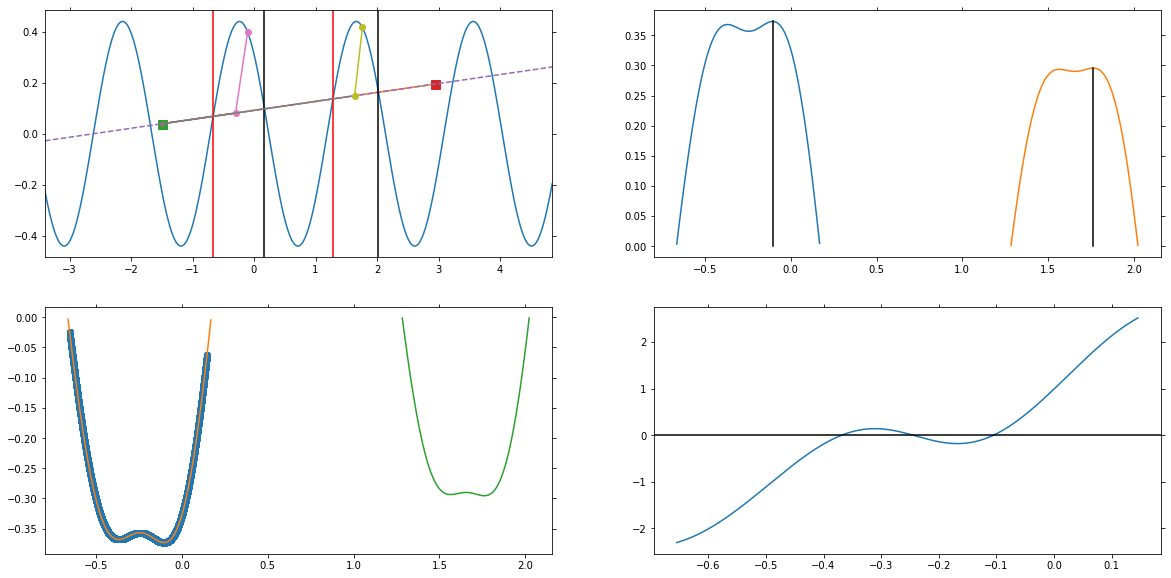

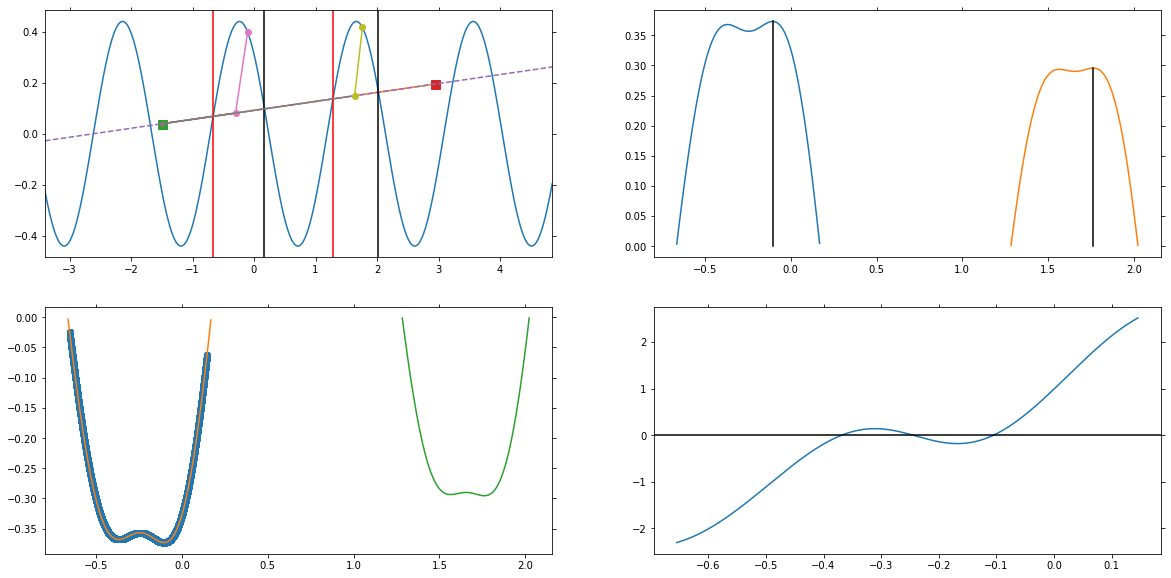

In [19]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 10 ), sharex=False, sharey=False)
f(0.44, 1.9, 0.7853981633974483, -1.5, 0.039, 2.948, 0.195)

0.93 2.67 0.7853981633974483 -1.5 0.289 3.0 0.125